In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as smb
import statsmodels.api as smo
import statsmodels.formula.api as smf
from scipy import stats

df = pd.read_csv(r'auto-mpg.csv', delimiter=' ', skipinitialspace = True, header= 0, index_col = False, na_values = "NaN")
df = df.dropna()

      mpg  cyl  displ     hp    mass   acc  year  origin  \
0    18.0    8  307.0  130.0  3504.0  12.0    70       1   
1    15.0    8  350.0  165.0  3693.0  11.5    70       1   
2    18.0    8  318.0  150.0  3436.0  11.0    70       1   
3    16.0    8  304.0  150.0  3433.0  12.0    70       1   
4    17.0    8  302.0  140.0  3449.0  10.5    70       1   
..    ...  ...    ...    ...     ...   ...   ...     ...   
393  27.0    4  140.0   86.0  2790.0  15.6    82       1   
394  44.0    4   97.0   52.0  2130.0  24.6    82       2   
395  32.0    4  135.0   84.0  2295.0  11.6    82       1   
396  28.0    4  120.0   79.0  2625.0  18.6    82       1   
397  31.0    4  119.0   82.0  2720.0  19.4    82       1   

                          name  
0    chevrolet chevelle malibu  
1            buick skylark 320  
2           plymouth satellite  
3                amc rebel sst  
4                  ford torino  
..                         ...  
393            ford mustang gl  
394            

In [6]:
df_training = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_training.index)

In [11]:
coef = df_test.corr()
print(coef)

             mpg       cyl     displ        hp      mass       acc      year  \
mpg     1.000000 -0.810177 -0.847146 -0.811941 -0.851669  0.544668  0.535090   
cyl    -0.810177  1.000000  0.949345  0.837095  0.902599 -0.478764 -0.380499   
displ  -0.847146  0.949345  1.000000  0.915056  0.948925 -0.544950 -0.417017   
hp     -0.811941  0.837095  0.915056  1.000000  0.864034 -0.733494 -0.465209   
mass   -0.851669  0.902599  0.948925  0.864034  1.000000 -0.432794 -0.289890   
acc     0.544668 -0.478764 -0.544950 -0.733494 -0.432794  1.000000  0.428854   
year    0.535090 -0.380499 -0.417017 -0.465209 -0.289890  0.428854  1.000000   
origin  0.613801 -0.608221 -0.631227 -0.506152 -0.622225  0.206448  0.158869   

          origin  
mpg     0.613801  
cyl    -0.608221  
displ  -0.631227  
hp     -0.506152  
mass   -0.622225  
acc     0.206448  
year    0.158869  
origin  1.000000  


<AxesSubplot:>

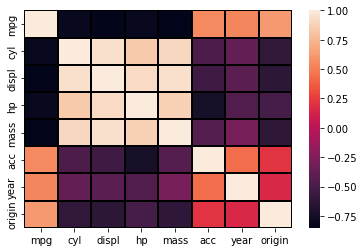

In [10]:
sns.heatmap(coef, linewidths=1.5, linecolor="black") #from this heatmap we can see that there is no linear regression in dataset

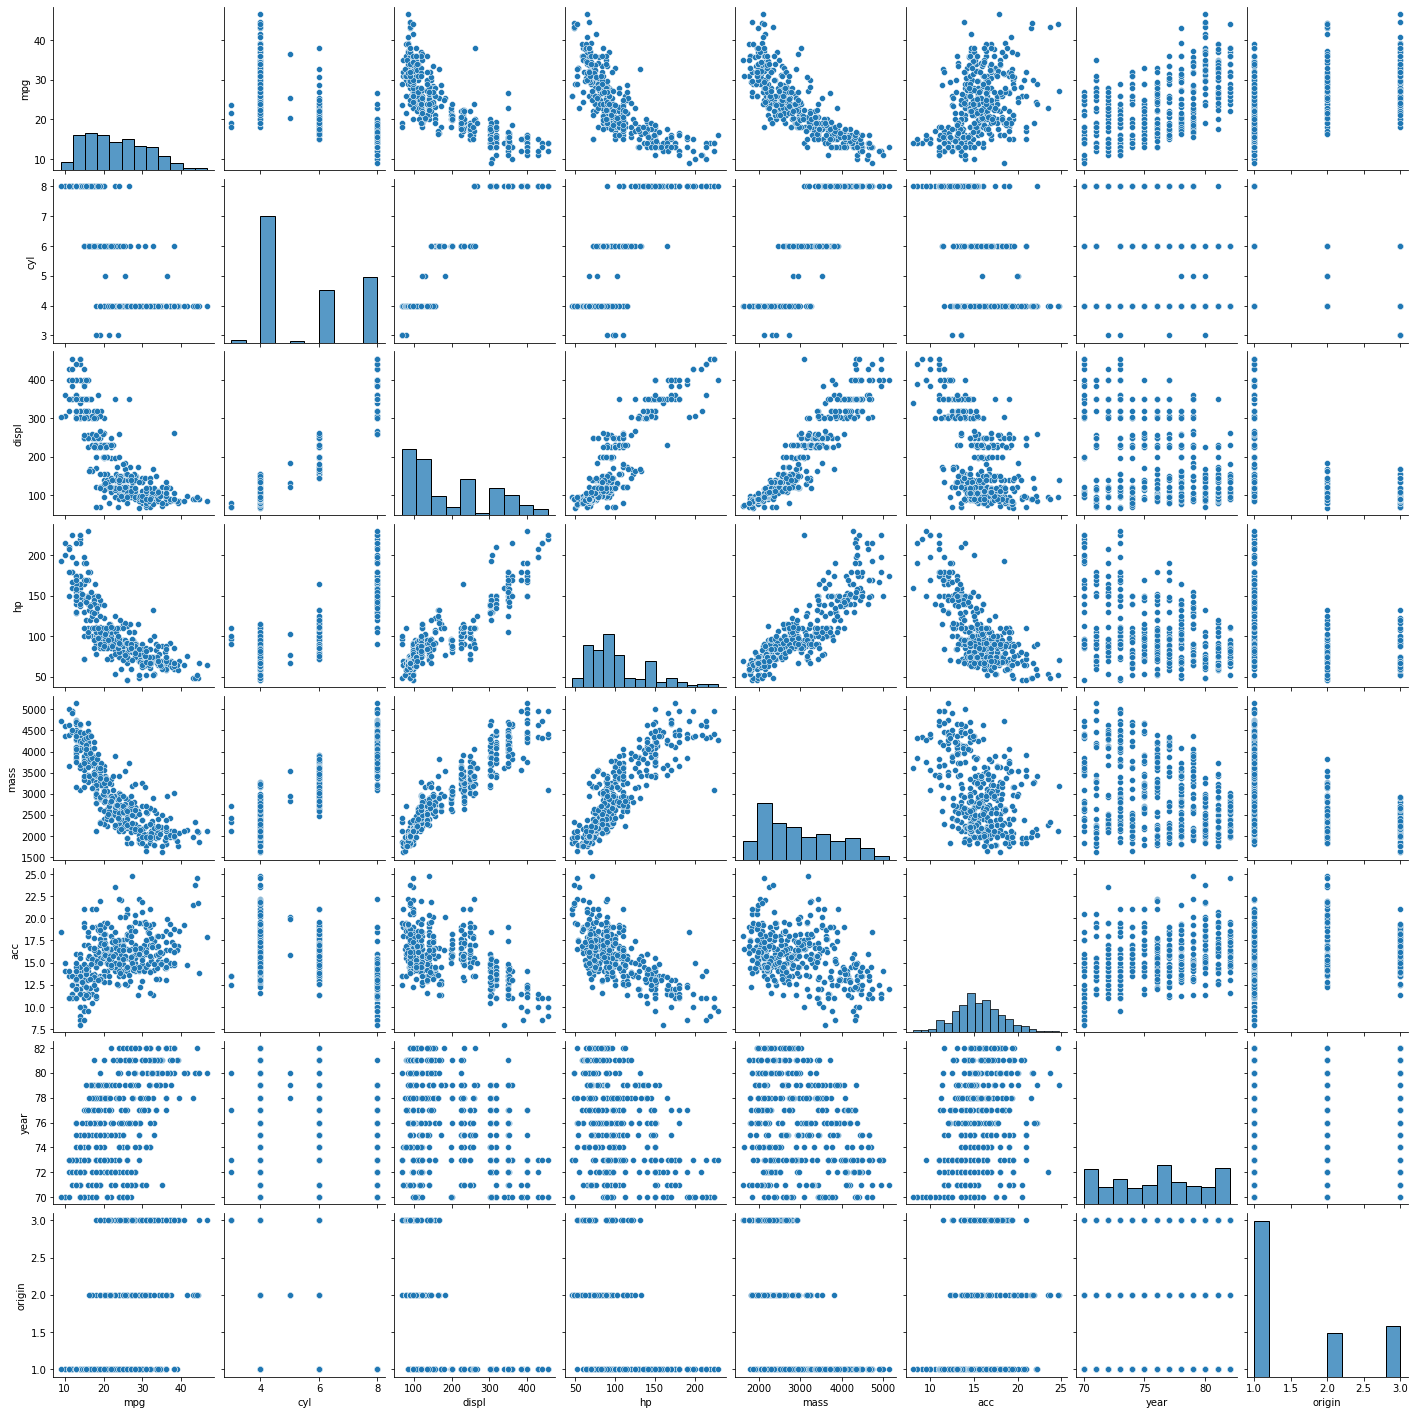

In [20]:
sns.pairplot(df) #checking if there is visible regression between variables with plots

We can see a regression between mpg and displ, hp, mass, acc, and year


In [58]:
def flogar(arg):
    
modar = smf.ols(formula = 'mpg ~ np.power(displ,-1) + np.power(hp, -1) + np.power(mass, -1) + year + np.exp(acc) ',data = df_training)#fitting these variables into 1 formula
res = modar.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     350.7
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          8.11e-125
Time:                        23:43:13   Log-Likelihood:                -790.08
No. Observations:                 314   AIC:                             1592.
Df Residuals:                     308   BIC:                             1615.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -57.2220      3.707    -15.437      0.000     -64.516     -49.928
np.power(displ, -1)   178.7158    150.574      1.187      0.236    -117.568     474.999
np.power(hp, -1)      194.6102    107.606      1.809      0.071     -17.125     406.345
np.power(mass, -1)   4.698e+04   5589.314      8.405      0.000     3.6e+04     5.8e+04
year                    0.7920      0.049     16.088      0.000       0.695       0.889
np.exp(acc)          3.143e-11   5.13e-11      0.613      0.540   -6.95e-11    1.32e-10
==============================================================================
Omnibus:                       41.210   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.181
Skew:                           0.683   Prob(JB):                     1.17e-19
Kurtosis:                       5.191   Cond. No.                     1.14e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

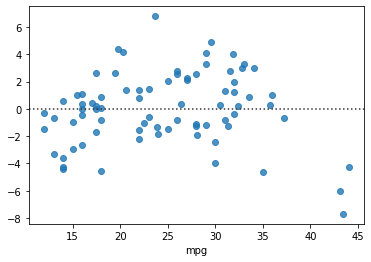

In [51]:
mpg_pred = res.predict(exog = df_test[['displ', 'hp', 'mass', 'year', 'acc']])
sns.residplot(x = df_test["mpg"], y = mpg_pred)
plt.show()